In [11]:
import numpy as np
import re
import nltk
nltk.download('wordnet')
from sklearn.datasets import load_files
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lenasoroka/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lenasoroka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
movie_data = load_files("txt_sentoken")
X, y = movie_data.data, movie_data.target

In [ ]:
'''
=======

Introduction

This README v2.0 (June, 2004) for the v2.0 polarity dataset comes from
the URL http://www.cs.cornell.edu/people/pabo/movie-review-data .

=======

What's New -- June, 2004

This dataset represents an enhancement of the review corpus v1.0
described in README v1.1: it contains more reviews, and labels were
created with an improved rating-extraction system.

=======

Citation Info 

This data was first used in Bo Pang and Lillian Lee,
``A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization 
Based on Minimum Cuts'',  Proceedings of the ACL, 2004.

@InProceedings{Pang+Lee:04a,
  author =       {Bo Pang and Lillian Lee},
  title =        {A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization Based on Minimum Cuts},
  booktitle =    "Proceedings of the ACL",
  year =         2004
}

=======

Data Format Summary 

- review_polarity.tar.gz: contains this readme and  data used in
  the experiments described in Pang/Lee ACL 2004.

  Specifically:

  Within the folder "txt_sentoken" are the 2000 processed down-cased
  text files used in Pang/Lee ACL 2004; the names of the two
  subdirectories in that folder, "pos" and "neg", indicate the true
  classification (sentiment) of the component files according to our
  automatic rating classifier (see section "Rating Decision" below).

  File names consist of a cross-validation tag plus the name of the
  original html file.  The ten folds used in the Pang/Lee ACL 2004 paper's
  experiments were:

     fold 1: files tagged cv000 through cv099, in numerical order
     fold 2: files tagged cv100 through cv199, in numerical order     
     ...
     fold 10: files tagged cv900 through cv999, in numerical order

  Hence, the file neg/cv114_19501.txt, for example, was labeled as
  negative, served as a member of fold 2, and was extracted from the
  file 19501.html in polarity_html.zip (see below).

  Each line in each text file corresponds to a single sentence, as
  determined by Adwait Ratnaparkhi's sentence boundary detector
  MXTERMINATOR.
 
  Preliminary steps were taken to remove rating information from the
  text files, but only the rating information upon which the rating
  decision was based is guaranteed to have been removed. Thus, if the
  original review contains several instances of rating information,
  potentially given in different forms, those not recognized as valid
  ratings remain part of the review text.
	
- polarity_html.zip: The original source files from which the
  processed, labeled, and (randomly) selected data in
  review_polarity.tar.gz was derived.

  Specifically:  

  This data consists of unprocessed, unlabeled html files from the
  IMDb archive of the rec.arts.movies.reviews newsgroup,
  http://reviews.imdb.com/Reviews. The files in review_polarity.tar.gz
  represent a processed subset of these files. 

=======

Rating Decision (Appendix A)

This section describes how we determined whether a review was positive
or negative.

The original html files do not have consistent formats -- a review may
not have the author's rating with it, and when it does, the rating can
appear at different places in the file in different forms.  We only
recognize some of the more explicit ratings, which are extracted via a
set of ad-hoc rules.  In essence, a file's classification is determined
based on the first rating we were able to identify.


- In order to obtain more accurate rating decisions, the maximum
	rating must be specified explicitly, both for numerical ratings
	and star ratings.  ("8/10", "four out of five", and "OUT OF
	****: ***" are examples of rating indications we recognize.)

- With a five-star system (or compatible number systems):
	three-and-a-half stars and up are considered positive, 
	two stars and below are considered negative.
- With a four-star system (or compatible number system):
	three stars and up are considered positive, 
	one-and-a-half stars and below are considered negative.  
- With a letter grade system:
	B or above is considered positive,
	C- or below is considered negative.

We attempted to recognize half stars, but they are specified in an
especially free way, which makes them difficult to recognize.  Hence,
we may lose a half star very occasionally; but this only results in 2.5
stars in five star system being categorized as negative, which is 
still reasonable.

'''

In [13]:
X[0]

b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is 

In [6]:
y[0]

0

In [7]:
len(y)

2000

In [8]:
set(y)

{0, 1}

In [9]:
y.sum()

1000

In [14]:
# Preprocessing

documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for item in range(0, len(X)):
    # remove all the special characters
    document = re.sub(r'\W', ' ', str(X[item]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = list(filter(lambda word: word != '', document))
    document = ' '.join(document)
    
    documents.append(document)

In [15]:
documents[0]

'arnold schwarzenegger ha been an icon for action enthusiast since the late 80 but lately his film have been very sloppy and the one liner are getting worse nit hard seeing arnold a mr freeze in batman and robin especially when he say ton of ice joke but hey he got 15 million what it matter to him nonce again arnold ha signed to do another expensive blockbuster that can compare with the like of the terminator series true lie and even eraser nin this so called dark thriller the devil gabriel byrne ha come upon earth to impregnate woman robin tunney which happens every 1000 year and basically destroy the world but apparently god ha chosen one man and that one man is jericho cane arnold himself nwith the help of trusty sidekick kevin pollack they will stop at nothing to let the devil take over the world nparts of this are actually so absurd that they would fit right in with dogma nyes the film is that weak but it better than the other blockbuster right now sleepy hollow but it make the wo

### BoW

In [16]:
vectorizer = CountVectorizer(max_features=1500, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [17]:
X.shape

(2000, 1500)

In [18]:
X[0]

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
lr = LogisticRegression(C=1)
lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test)

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


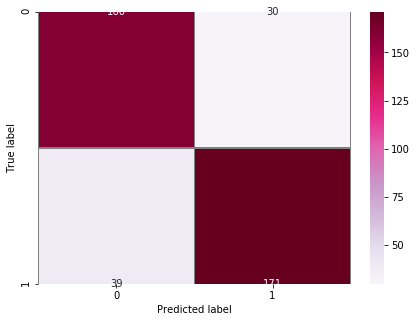

In [22]:
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='PuRd', 
                      linewidths=.5, linecolor='gray',fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [23]:
print(classification_report(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Roc-auc: ", roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       190
           1       0.85      0.81      0.83       210

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

Accuracy:  0.8275
Roc-auc:  0.8281954887218045


In [24]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test)

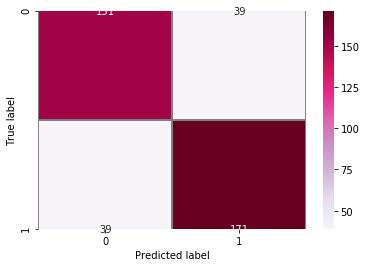

In [25]:
fig = plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='PuRd', 
                      linewidths=.5, linecolor='gray',fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
print(classification_report(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Roc-auc: ", roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       190
           1       0.81      0.81      0.81       210

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400

Accuracy:  0.805
Roc-auc:  0.8045112781954888


In [27]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

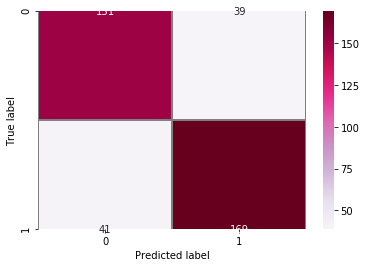

In [28]:
fig = plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='PuRd', 
                      linewidths=.5, linecolor='gray',fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
print(classification_report(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Roc-auc: ", roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       190
           1       0.81      0.80      0.81       210

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400

Accuracy:  0.8
Roc-auc:  0.799749373433584


### TF-IDF

In [30]:
tfidfconverter = TfidfVectorizer(max_features=2000, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [31]:
X[0][:20]

array([0.        , 0.        , 0.        , 0.        , 0.06290197,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05832228, 0.        , 0.        , 0.        , 0.        ])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
lr = LogisticRegression(C=1)
lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test)

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


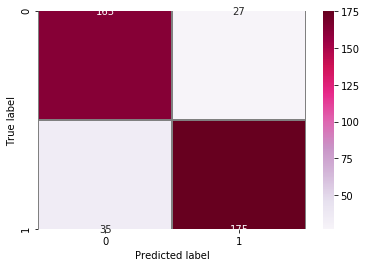

In [35]:
fig = plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='PuRd', 
                      linewidths=.5, linecolor='gray',fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [36]:
print(classification_report(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Roc-auc: ", roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       190
           1       0.87      0.83      0.85       210

    accuracy                           0.84       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.85      0.84      0.85       400

Accuracy:  0.845
Roc-auc:  0.8456140350877194


In [37]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test)

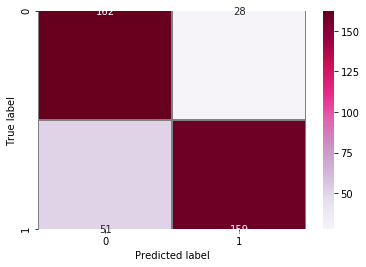

In [38]:
fig = plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='PuRd', 
                      linewidths=.5, linecolor='gray',fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [39]:
print(classification_report(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Roc-auc: ", roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       190
           1       0.85      0.76      0.80       210

    accuracy                           0.80       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400

Accuracy:  0.8025
Roc-auc:  0.8048872180451128


In [40]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

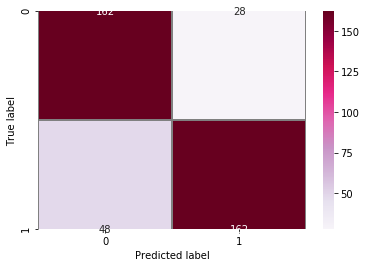

In [41]:
fig = plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='PuRd', 
                      linewidths=.5, linecolor='gray',fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [42]:
print(classification_report(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Roc-auc: ", roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       190
           1       0.85      0.77      0.81       210

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

Accuracy:  0.81
Roc-auc:  0.8120300751879699


### Exercises:
1) Try other classifiers, compare results;  
2) Find best meta parameters using GridSearch/RandomSearch.